Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  Rela

<ipython-input-1-34e880cb040d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean(), inplace=True)


Accuracy: 0.8208616780045351
              precision    recall  f1-score   support

       False       0.88      0.92      0.90       380
        True       0.29      0.20      0.23        61

    accuracy                           0.82       441
   macro avg       0.58      0.56      0.57       441
weighted avg       0.80      0.82      0.81       441



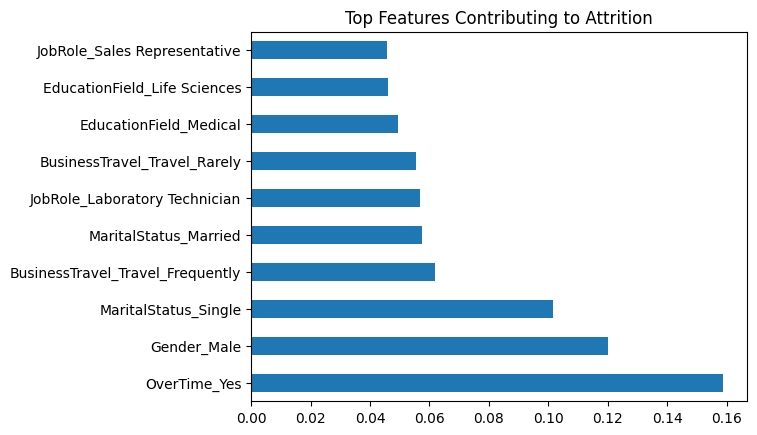

Index(['Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')
Index(['Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField

In [1]:
from google.colab import files

uploaded = files.upload()
import pandas as pd

data = pd.read_csv('HR-Employee-Attrition.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean(), inplace=True)

print(data.isnull().sum())
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top Features Contributing to Attrition")
plt.show()
import plotly.express as px

print(data.columns)

categorical_cols = data.select_dtypes(include=['object']).columns

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data.columns)

attrition_by_department = data.groupby('Department_Research & Development')['Attrition_Yes'].mean()

fig = px.bar(x=attrition_by_department.index, y=attrition_by_department.values,
             labels={'x': 'Department', 'y': 'Attrition Rate'},
             title="Attrition Rate by Department")
fig.show()
